In [21]:
from plots import *
from interpolations import *
from grouping import *

source_names= get_source_names()
source_series = []
for source_name in source_names:
    source_series.append(get_source_ser('cr', source_name, 'mean'))


In [29]:
interpolations = []

for source_ser in source_series:
    x, y = poly_interp(source_ser)
    y_new = interp_gradient(x, y)
    interpolated_data = pd.Series(y_new, index=x)
    interpolations.append(interpolated_data)

In [30]:
# Assuming interpolations is a list of pandas Series objects
data = {source_names[i]: interpolations[i] for i in range(len(source_names))}
df = pd.DataFrame(data)

# Calculating the correlation matrix
correlation_matrix = df.corr()


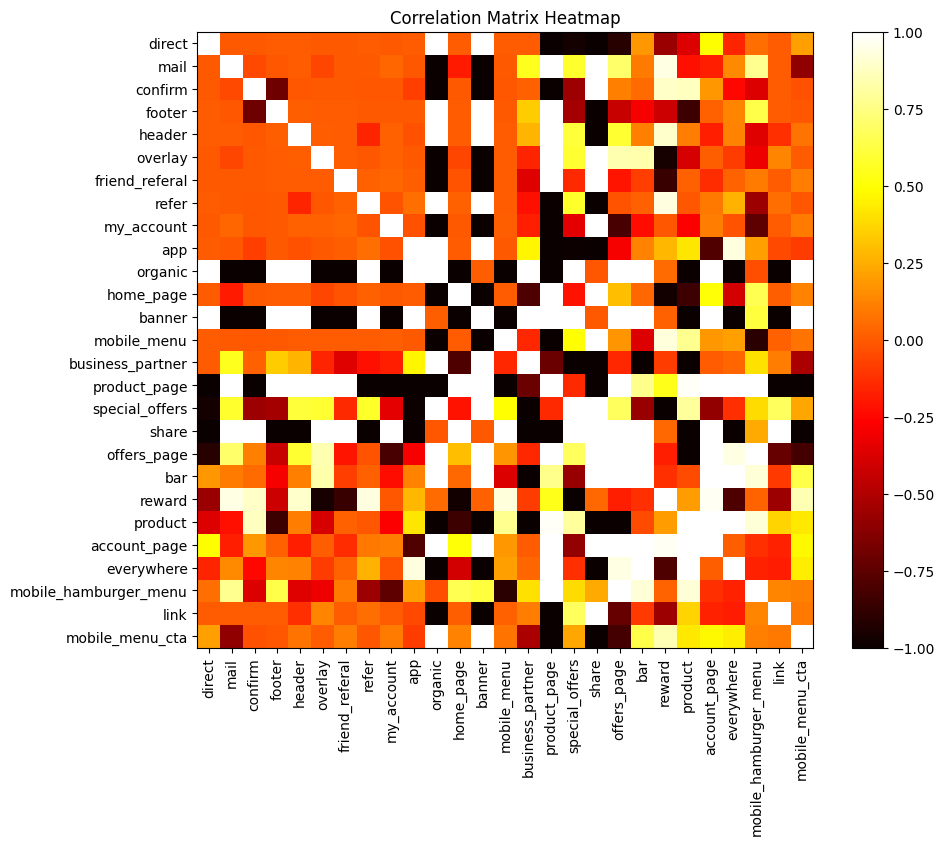

In [31]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()